# Evaluation Metrics

## Accuracy Review
The accuracy should actually be no. of all data points labeled correctly divided by all data points. If we are looking at performance on a specific class, then we are looking at recall, which will be covered later in the lesson.

In [1]:
# just a helper function for easier youtube call
def strip_url(url):
    return url.replace('https://youtu.be/','')

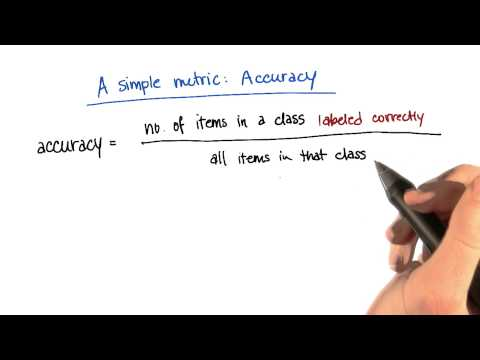

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/g3sxDtlGlAM'))

## Shortcomings of Accuracy

Accuracy is not particularly good if any of these cases apply to you. Precision and recall, which are the focus of this lecture, can really help.

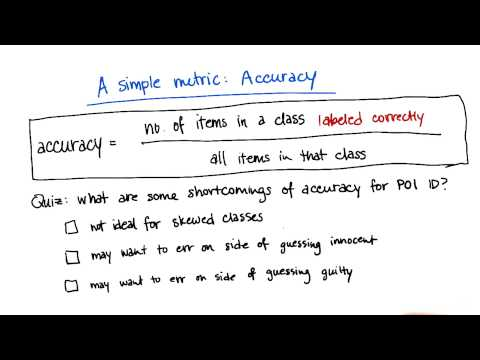

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/9JfaMZcSlQA'))

## Precision and Recall

**Recall:** True Positive / (True Positive + False Negative). Out of all the items that are truly positive, how many were correctly classified as positive. Or simply, how many positive items were 'recalled' from the dataset.

**Precision:** True Positive / (True Positive + False Positive). Out of all the items labeled as positive, how many truly belong to the positive class.

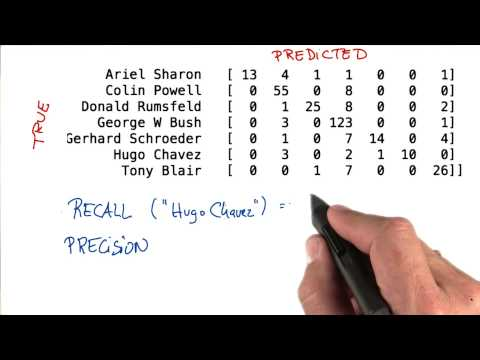

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/3vT0kSBCLdU'))

## True Positives in Eigenfaces

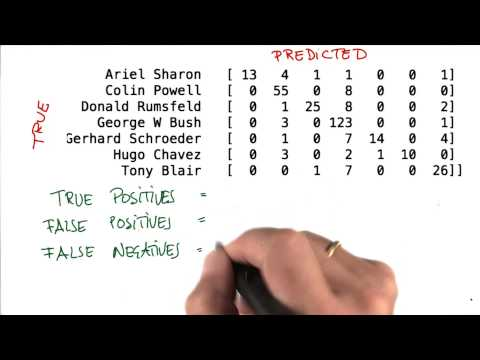

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/bgT8sWuV2lc'))

True Positive => Algorithm predicts Tony Blair and Reality is Tony Blair

False Positive => Algorithm predicts Tony Blair but Reality is others

False Negative => Algorithm predicts others but Reality is Tony Blair

For True positives, its 26

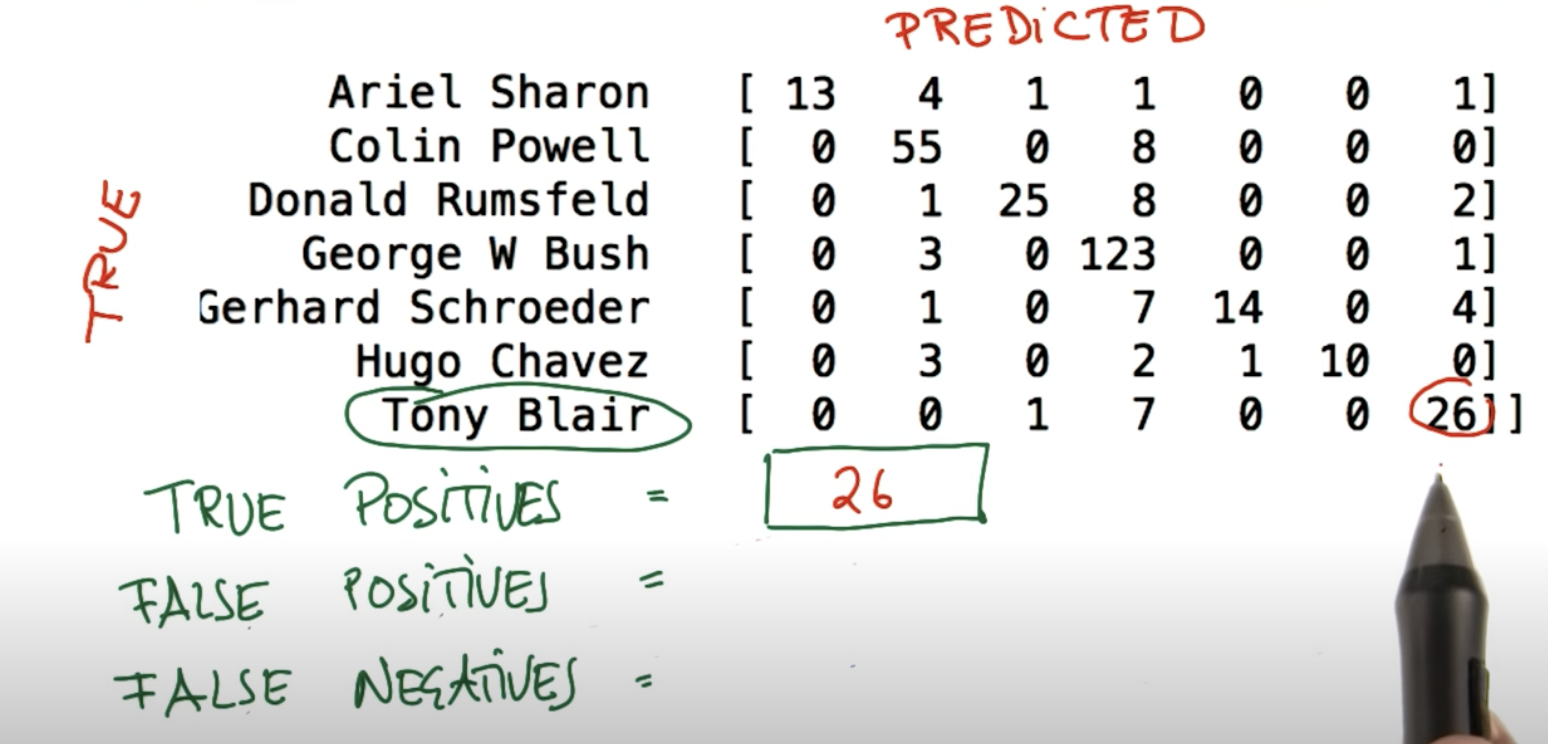

## False Positives in Eigenfaces

For False positives, its 8

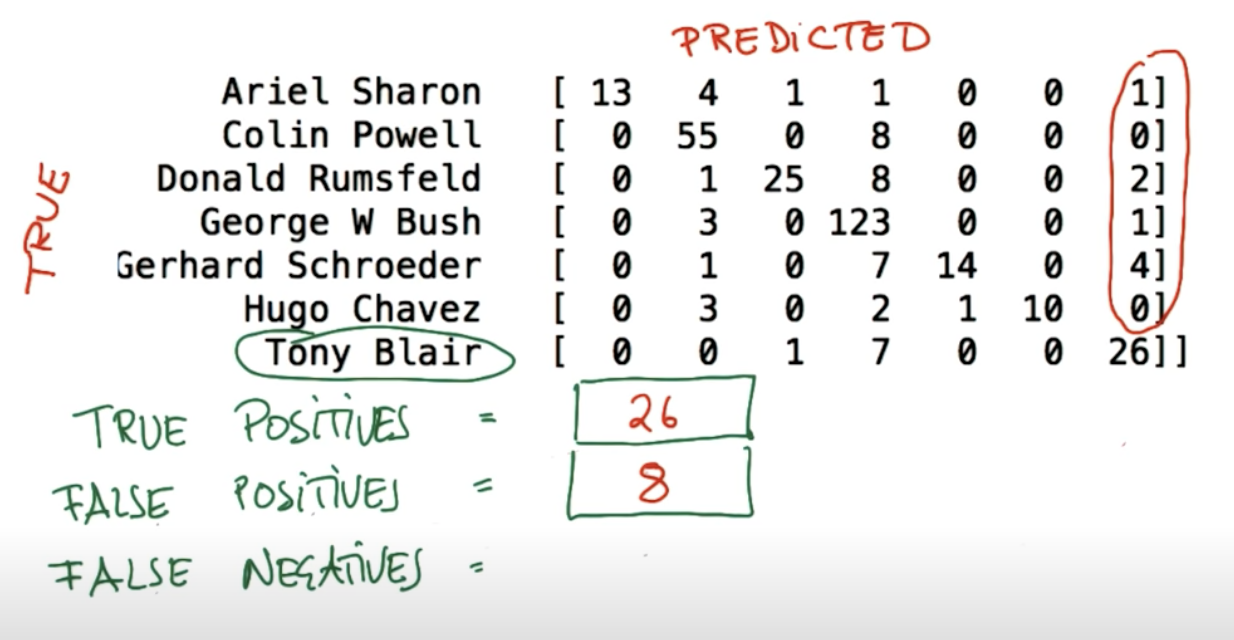

## False Negatives in Eigenfaces

For False negatives, its 8

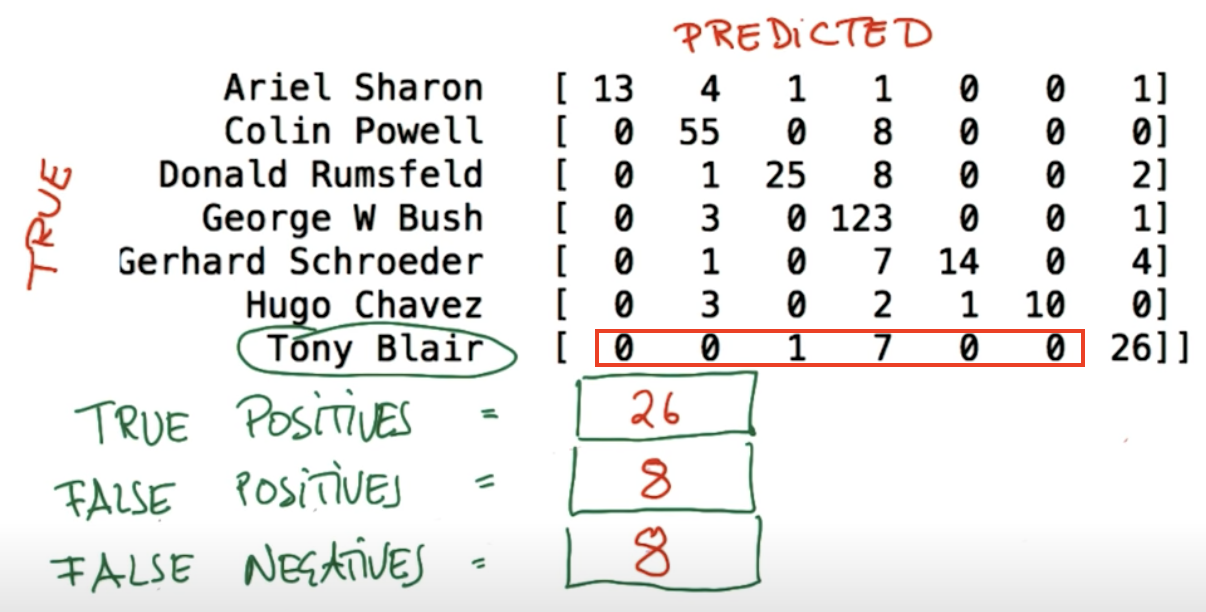

## Equation for Precision

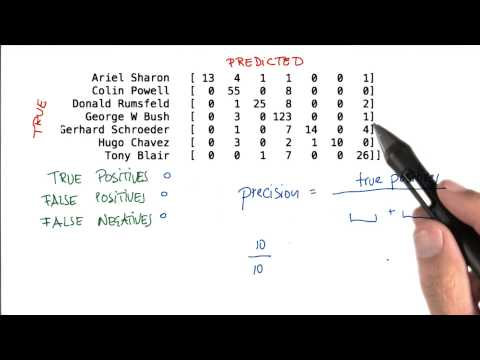

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/8QEAYYIyopY'))

$$
Precision = \frac{True  Positives}{True Positive + False Positive}
$$

Remember, the generalized notion

Given a **Subject**,

**True Positive** => Algorithm predicts **Subject** and Reality is Subject

**False Positive** => Algorithm predicts **Subject** but Reality is **others**

**False Negative** => Algorithm predicts **others** but Reality is **Subject**

**Positive** => always predicting the **Subject** and Negative, otherwise.

**True** => always Reality inline with **Prediction** and False, otherwise